In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import random as rd
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
from pandas import DataFrame
from pandas import read_csv
from matplotlib import pyplot
import numpy

# 괴물쥐_935176016

### 채팅 데이터 불러오기

In [9]:
chat = pd.read_csv("chat data/game/935176016.csv", names=['일시','시청자ID','채팅내용'])
chat

,일시,시청자ID,채팅내용
0,0:00:14,변스코,ㅎㅇ
1,0:00:16,jms1205,ㅎㅇㅎㅇ
2,0:00:17,변스코,지각 안햇네
3,0:00:20,아니키라불러,어셈블
4,0:00:26,누구일까나,ㅡ
...,...,...,...
58948,8:03:22,뽀송세연,HeyGuys HeyGuys HeyGuys HeyGuys
58949,8:03:22,포테이토더블치즈엣지,BibleThump BibleThump BibleThump BibleThump Bi...
58950,8:03:23,나태24,HeyGuys
58951,8:03:23,석박이_,BibleThump


### 채팅 데이터 노이즈(채팅봇, 아스키아트) 제거

In [10]:
chat_dot = chat.채팅내용.str.contains('[⠁⠃⠉⠙⠑⠋⠛⠓⠊⠚⠅⠇⠍⠝⠕⠏⠟⠗⠎⠞⠥⠧⠺⠭⠽⠵⠠⠁⠃⠉⠙⠑⠋⠛⠓⠊⠚]',na=False) 
chat = chat[~chat_dot]
chat = chat[chat['시청자ID'] != "Nightbot"]
chat

,일시,시청자ID,채팅내용
0,0:00:14,변스코,ㅎㅇ
1,0:00:16,jms1205,ㅎㅇㅎㅇ
2,0:00:17,변스코,지각 안햇네
3,0:00:20,아니키라불러,어셈블
4,0:00:26,누구일까나,ㅡ
...,...,...,...
58948,8:03:22,뽀송세연,HeyGuys HeyGuys HeyGuys HeyGuys
58949,8:03:22,포테이토더블치즈엣지,BibleThump BibleThump BibleThump BibleThump Bi...
58950,8:03:23,나태24,HeyGuys
58951,8:03:23,석박이_,BibleThump


In [11]:
chat_number = chat.groupby('일시')['채팅내용'].count()
chat_number

일시
0:00:14     1
0:00:16     1
0:00:17     1
0:00:20     1
0:00:26     1
           ..
8:03:19     5
8:03:20     4
8:03:21    10
8:03:22    11
8:03:23     3
Name: 채팅내용, Length: 21577, dtype: int64

In [12]:
df1 = DataFrame(chat_number)
df1 = df1.reset_index()
df1.rename(columns= {'일시':'시간', '채팅내용':'채팅수'}, inplace=True)
df1

,시간,채팅수
0,0:00:14,1
1,0:00:16,1
2,0:00:17,1
3,0:00:20,1
4,0:00:26,1
...,...,...
21572,8:03:19,5
21573,8:03:20,4
21574,8:03:21,10
21575,8:03:22,11


In [13]:
df1['시간'] = pd.to_datetime(df1['시간'])
df1 = df1.set_index('시간')
date_index = pd.date_range('00:00:00', '08:03:23', freq='s')
df1 = df1.reindex(date_index, fill_value=0)

In [14]:
df1 = df1.reset_index()
df1.rename(columns= {'index':'시간'}, inplace=True)
df1['시간'] = df1['시간'].dt.strftime('%H:%M:%S')
df1

,시간,채팅수
0,00:00:00,0
1,00:00:01,0
2,00:00:02,0
3,00:00:03,0
4,00:00:04,0
...,...,...
28999,08:03:19,5
29000,08:03:20,4
29001,08:03:21,10
29002,08:03:22,11


C:\Users\jaegun\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jaegun\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54021 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jaegun\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jaegun\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 52292 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jaegun\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54021 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jaegun\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49688 missing from

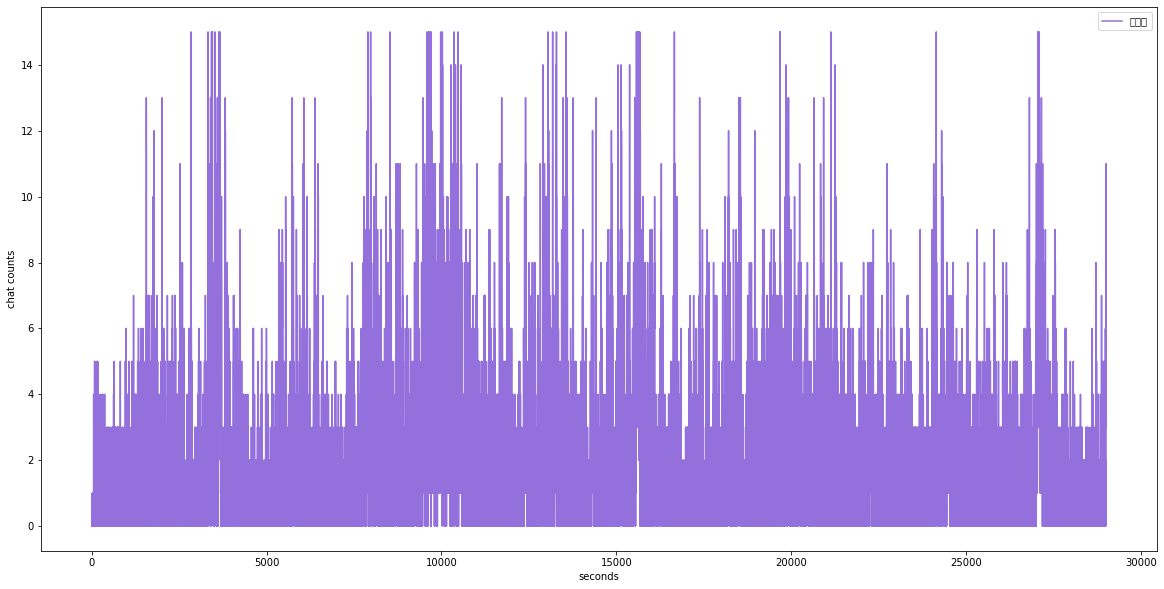

In [15]:
df1.plot(kind='line', figsize=(20,10), color='mediumpurple')
plt.xlabel("seconds")
plt.ylabel("chat counts")
plt.savefig('./935176016.png')

## 채팅 트래픽 기반 하이라이트 추출

### 하이라이트 알고리즘 parameter 설정

In [16]:
chat.count()

일시       58951
시청자ID    58951
채팅내용     58949
dtype: int64

In [17]:
a = np.percentile(df1['채팅수'], 99) 
a

11.0

In [18]:
b = df1['채팅수'].mean()
b

2.0324438008550545

In [19]:
c = np.std(df1['채팅수'])
c

2.2549878086933903

In [20]:
t = (a - b) / c
t

3.9767648253233907

In [21]:
df1['채팅수']

0         0
1         0
2         0
3         0
4         0
         ..
28999     5
29000     4
29001    10
29002    11
29003     3
Name: 채팅수, Length: 29004, dtype: int64

### 하이라이트 선정 알고리즘

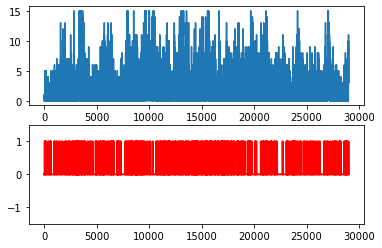

In [28]:
import numpy as np
import pylab


def init(x, lag, threshold, influence):

    labels = np.zeros(lag) 
    filtered_y = np.array(x[0:lag]) 
    avg_filter = np.zeros(lag)
    std_filter = np.zeros(lag)
    var_filter = np.zeros(lag)

    avg_filter[lag - 1] = np.mean(x[0:lag])
    std_filter[lag - 1] = np.std(x[0:lag])
    var_filter[lag - 1] = np.var(x[0:lag])

    return dict(avg=avg_filter[lag - 1],
                var=var_filter[lag - 1],
                std=std_filter[lag - 1],
                filtered_y=filtered_y,
                labels=labels)

def add(esult, single_value, lag, threshold, influence):
    previous_avg = result['avg']
    previous_var = result['var']
    previous_std = result['std']
    filtered_y = result['filtered_y']
    labels = result['labels']

    if abs(single_value - previous_avg) > threshold * previous_std:
        if single_value > previous_avg:
            labels = np.append(labels, 1)
        else:
            labels = np.append(labels, -1)

        filtered_y = np.append(filtered_y, influence * single_value
                               + (1 - influence) * filtered_y[-1])
    else:
        labels = np.append(labels, 0)
        filtered_y = np.append(filtered_y, single_value)

    current_avg_filter = previous_avg + 1. / lag * (filtered_y[-1]
            - filtered_y[len(filtered_y) - lag - 1])

    current_var_filter = previous_var + 1. / lag * ((filtered_y[-1]
            - previous_avg) ** 2 - (filtered_y[len(filtered_y) - 1
            - lag] - previous_avg) ** 2 - (filtered_y[-1]
            - filtered_y[len(filtered_y) - 1 - lag]) ** 2 / lag)  
    
    current_std_filter = np.sqrt(current_var_filter)

    return dict(avg=current_avg_filter,
                var=current_var_filter,
                std=current_std_filter,
                filtered_y=filtered_y[1:],
                labels=labels)

lag = 25
threshold = t
influence = 0

y = df1['채팅수']

result = init(y[:lag], lag=lag, threshold=threshold, influence=influence)

for i in y[lag:]:
    result = add(result, i, lag, threshold, influence)

pylab.subplot(211)
pylab.plot(np.arange(1, len(y) + 1), y)
pylab.subplot(212)
pylab.step(np.arange(1, len(y) + 1), result['labels'], color='red',
           lw=2)
pylab.ylim(-1.5, 1.5)
pylab.show()

In [29]:
highlight_result = result['labels']
highlight_result

array([0., 0., 0., ..., 0., 0., 0.])

In [30]:
column_highlight = ['하이라이트 여부']
df2 = pd.DataFrame(highlight_result, columns=column_highlight)
df2 = df2.replace(0.0, "X")
df2 = df2.replace(1.0, "O")
df2

,하이라이트 여부
0,X
1,X
2,X
3,X
4,X
...,...
28999,X
29000,X
29001,X
29002,X


In [31]:
chat_highlightall = pd.concat([df1, df2], axis=1)
chat_highlightall

,시간,채팅수,하이라이트 여부
0,00:00:00,0,X
1,00:00:01,0,X
2,00:00:02,0,X
3,00:00:03,0,X
4,00:00:04,0,X
...,...,...,...
28999,08:03:19,5,X
29000,08:03:20,4,X
29001,08:03:21,10,X
29002,08:03:22,11,X


In [ ]:
chat_highlight = chat_highlightall[chat_highlightall['하이라이트 여부'] == "O"]
chat_highlight

In [ ]:
# csv로 변환 후 비교해보기

chat_highlight.to_csv("[Chat Highlight]괴물쥐_935176016.csv")